In [105]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

df = pd.read_csv('course/data/mlbootcamp5_train.csv', sep=';', index_col='id')

Populating the interactive namespace from numpy and matplotlib


In [9]:
df.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            1     1      0   
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   

    alco  active  cardio  
id                        
0      0       1       0  
1      0       1       1  
2      0       0       1  
3      0       1       1  
4      0       0       0

In [8]:
df.describe()

age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   19468.865814      1.349571    164.359229     74.205690    128.817286   
std     2467.251667      0.476838      8.210126     14.395757    154.011419   
min    10798.000000      1.000000     55.000000     10.000000   -150.000000   
25%    17664.000000      1.000000    159.000000     65.000000    120.000000   
50%    19703.000000      1.000000    165.000000     72.000000    120.000000   
75%    21327.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      96.630414      1.366871      1.226457      0.088129      0.053771   
std      188.472530      0.680250      0.572270      0.283484      0.225568   
min      -70.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max    11000.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  70000.000000  70000.000000  
mean       0.803729      0.499700  
std        0.397179      0.500003  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [12]:
df['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

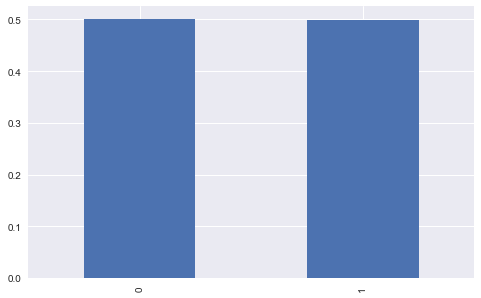

In [113]:
df['cardio'].value_counts(normalize=True).plot(kind='bar', label='cardio')

In [22]:
FEMALE = 1
MALE = 2
df.groupby(['gender'])['height'].describe()
# gender == 1 -- female
# gender == 2 -- male

gender       
1       count    45530.000000
        mean       161.355612
        std          7.052726
        min         55.000000
        25%        157.000000
        50%        161.000000
        75%        166.000000
        max        250.000000
2       count    24470.000000
        mean       169.947895
        std          7.228895
        min         65.000000
        25%        165.000000
        50%        170.000000
        75%        175.000000
        max        207.000000
Name: height, dtype: float64

gender
1    Axes(0.125,0.125;0.775x0.755)
2    Axes(0.125,0.125;0.775x0.755)
Name: height, dtype: object

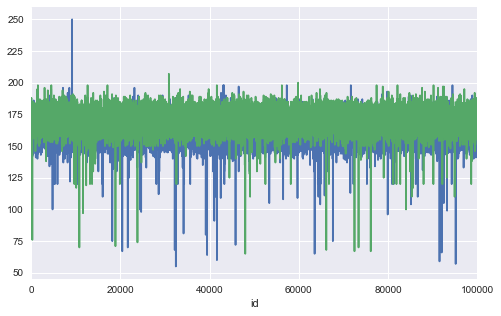

In [116]:
df.groupby(['gender'])['height'].plot()

In [15]:
df.sort_values(by='height', ascending=False).head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                             
9223   21220       1     250    86.0    140    100            3     1      0   
30894  19054       2     207    78.0    100     70            1     1      0   
59847  19187       2     200   100.0    170   1100            2     2      0   
12687  22497       2     198    79.0    160    100            1     1      1   
43083  23274       1     198    85.0    110     90            1     1      0   

       alco  active  cardio  
id                           
9223      0       1       1  
30894     1       1       0  
59847     0       1       1  
12687     0       0       1  
43083     0       1       0

In [17]:
df.groupby(['gender'])['alco'].value_counts()

gender  alco
1       0       44369
        1        1161
2       0       21867
        1        2603
Name: alco, dtype: int64

In [27]:
df.groupby(['gender'])['smoke'].mean()

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

In [33]:
df.groupby(['smoke'])['age'].mean()

smoke
0    19505.400730
1    19090.836927
Name: age, dtype: float64

In [34]:
df['age'].max()

23713

In [35]:
df['age'].min()

10798

In [122]:
df['age_years'] = round(df['age'] / 365.0).astype(int)

In [123]:
df['age_years'].head()

id
0    50
1    55
2    52
3    48
4    48
Name: age_years, dtype: int64

In [124]:
male = (df['gender'] == 2)
female = (df['gender'] == 1)
target_age_and_sex = male & (df['age_years'] >= 60) & (df['age_years'] <= 64)
sad = df[target_age_and_sex & (df['ap_hi'] < 120.0) & (df['cholesterol'] == 1.0)]
print (sad.shape)

(420, 13)


In [57]:
sad2 = df[target_age_and_sex & (df['ap_hi'] >= 160.0) & (df['ap_hi'] < 180.0) & (df['cholesterol'] == 3.0)]
print (sad2.shape)

(100, 13)


In [58]:
df['weight'].describe()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

In [59]:
df['height'].describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [60]:
df['meters'] = df['height'] / 100.0
df['bmi'] = df['weight'] / (df['meters'] * df['meters'])
df['bmi'].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: bmi, dtype: float64

In [64]:
df[female]['bmi'].describe()

count    45530.000000
mean        27.987583
std          6.495638
min          8.001829
25%         23.875115
50%         26.709402
75%         31.044558
max        298.666667
Name: bmi, dtype: float64

In [65]:
df[male]['bmi'].describe()

count    24470.000000
mean        26.754442
std          5.162752
min          3.471784
25%         23.781213
50%         25.910684
75%         29.043709
max        180.678074
Name: bmi, dtype: float64

In [66]:
df[df['cardio'] == 0]['bmi'].describe()

count    35021.000000
mean        26.548175
std          5.606469
min          7.022248
25%         23.388687
50%         25.476660
75%         28.763971
max        237.768633
Name: bmi, dtype: float64

In [67]:
df[df['cardio'] == 1]['bmi'].describe()

count    34979.000000
mean        28.566061
std          6.383666
min          3.471784
25%         24.489796
50%         27.471384
75%         31.555556
max        298.666667
Name: bmi, dtype: float64

In [99]:
sick = (df['cardio'] == 1)
healthy = (df['cardio'] == 0)
non_alco = (df['alco'] == 0)
df[male & healthy & non_alco]['bmi'].mean()

25.87263807546017

In [100]:
df[female & healthy & non_alco]['bmi'].mean()

26.845406594131507

In [102]:
correct_ap = (df['ap_lo'] < df['ap_hi']) 
clean1 = df[correct_ap]
print (clean1.shape[0])

68764


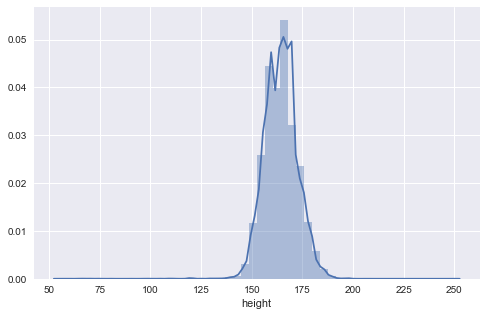

In [106]:
sns.distplot(df['height'])

In [107]:
clean2 = clean1[(clean1['height'] >= clean1['height'].quantile(.25))]
print (clean2.shape[0])

52560


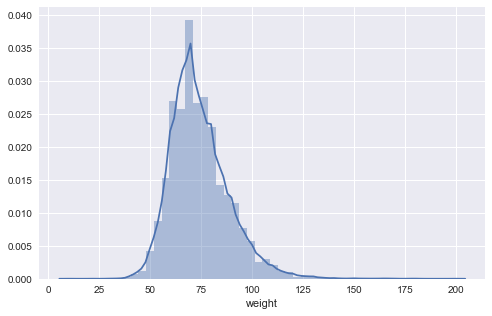

In [108]:
sns.distplot(df['weight'])

In [92]:
clean3 = clean2[(clean2['height'] <= clean2['height'].quantile(.975))]
print (clean3.shape)

(51349, 15)


In [94]:
clean4 = clean3[(clean3['weight'] >= clean3['weight'].quantile(.25)) | (clean3['weight'] <= clean3['weight'].quantile(.975))]
print (clean4.shape)

(51349, 15)


In [97]:
print (1 - (clean4.shape[0] / df.shape[0]))

0.2664428571428571


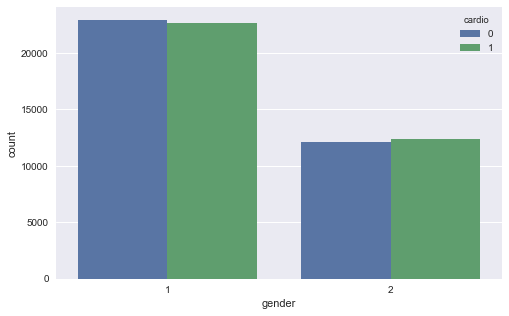

In [118]:
sns.countplot(x='gender', hue='cardio', data=df)